# The Movies Database (TMDB) Visualization

This code imports essential libraries for data manipulation, visualization, and displaying results (pandas, matplotlib, seaborn, IPython.display), along with cassandrautils for interacting with Cassandra databases.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display
from cassandrautils import *


This code retrieves a DataFrame of movies, extracts the release year from the release_date column, and displays the first 20 rows of the updated DataFrame in a neatly formatted table using IPython.display.

In [2]:
def display_table(dataframe, rows=10):
    from IPython.display import display
    display(dataframe.head(rows))


movies_df = getMoviesDF()
movies_df['release_year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year
display_table(movies_df, rows=20)


movies


,id,adult,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count,release_year
0,533535,False,en,Deadpool & Wolverine,A listless Wade Wilson toils away in civilian ...,1024.061,2024-07-24,Deadpool & Wolverine,7.685,5627,2024
1,558449,False,en,Gladiator II,Years after witnessing the death of the revere...,1530.032,2024-11-13,Gladiator II,6.700,759,2024
2,698687,False,en,Transformers One,The untold origin story of Optimus Prime and M...,886.579,2024-09-11,Transformers One,8.083,779,2024
3,1034541,False,en,Terrifier 3,Five years after surviving Art the Clown's Hal...,1327.327,2024-10-09,Terrifier 3,6.884,1128,2024
4,1100782,False,en,Smile 2,"About to embark on a new world tour, global po...",1937.917,2024-10-16,Smile 2,6.677,704,2024
5,791042,False,en,Levels,"After witnessing his girlfriend's murder, a ma...",1115.065,2024-11-01,Levels,5.780,25,2024
6,845781,False,en,Red One,After Santa Claus (codename: Red One) is kidna...,806.165,2024-10-31,Red One,6.606,175,2024
7,1184918,False,en,The Wild Robot,"After a shipwreck, an intelligent robot called...",1622.387,2024-09-12,The Wild Robot,8.406,3165,2024
8,1118031,False,es,Apocalipsis Z: el principio del fin,When a kind of rabies that transforms people i...,1231.46,2024-10-04,Apocalypse Z: The Beginning of the End,6.728,587,2024
9,1241982,False,en,Moana 2,After receiving an unexpected call from her wa...,1853.708,2024-11-27,Moana 2,7.500,45,2024


This function identifies the top 10 highest-rated movies based on average votes, and visualizes them as a horizontal bar chart, with movie titles on the y-axis and their corresponding average votes on the x-axis.

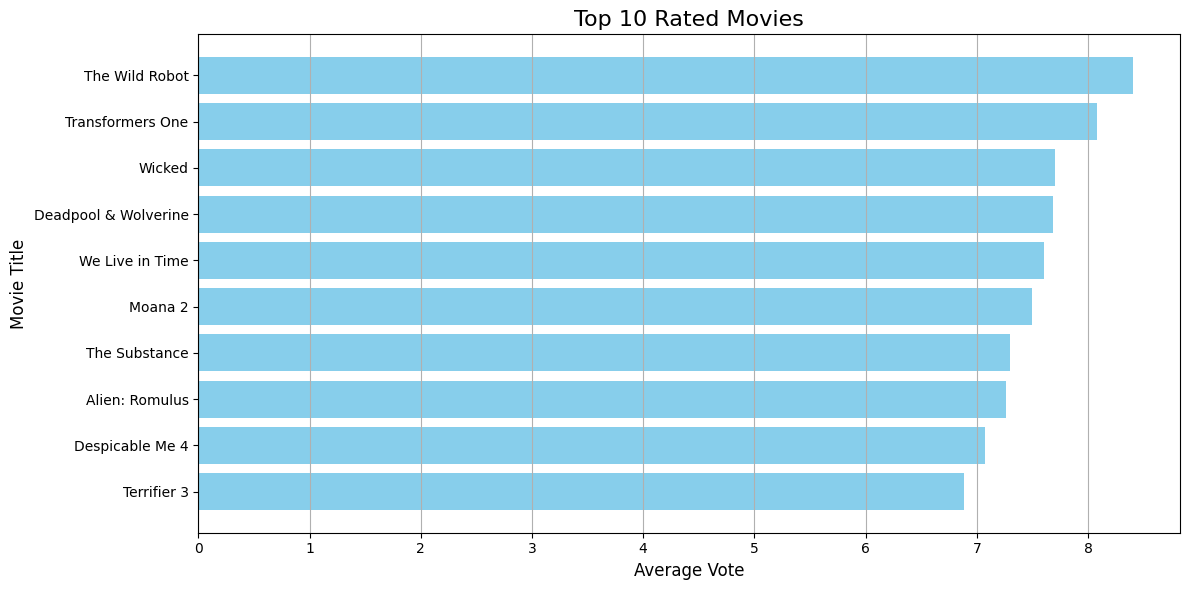

In [3]:
def plot_top_rated_movies(movies_df):
    top_rated = movies_df.nlargest(10, 'vote_average')[['title', 'vote_average']]

    plt.figure(figsize=(12, 6))
    plt.barh(top_rated['title'], top_rated['vote_average'], color='skyblue')
    plt.title("Top 10 Rated Movies", fontsize=16)
    plt.xlabel("Average Vote", fontsize=12)
    plt.ylabel("Movie Title", fontsize=12)
    plt.gca().invert_yaxis()
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()


plot_top_rated_movies(movies_df)


This function analyzes the top 10 highest-rated movies by listing their titles and average votes, calculating key statistics such as the highest, lowest, and average ratings, and highlighting the movie with the highest rating.

In [4]:
def analyze_top_rated_movies(movies_df):
    # Extract the top 10 rated movies
    top_rated = movies_df.nlargest(10, 'vote_average')[['title', 'vote_average']]
    
    # Initialize the analysis
    analysis = "Analysis of Top 10 Rated Movies:\n\n"
    
    # Add insights for each movie, ensuring numbering is from 1 to 10
    for i, row in enumerate(top_rated.itertuples(index=False), start=1):
        analysis += f"{i}. {row.title}: Average Vote = {row.vote_average:.1f}\n"
    
    # Identify key statistics
    highest_rating = top_rated['vote_average'].max()
    lowest_rating = top_rated['vote_average'].min()
    average_rating = top_rated['vote_average'].mean()
    
    analysis += "\nKey Statistics:\n"
    analysis += f" - Highest Rating: {highest_rating:.1f}\n"
    analysis += f" - Lowest Rating: {lowest_rating:.1f}\n"
    analysis += f" - Average Rating of Top 10 Movies: {average_rating:.1f}\n"
    
    # Highlight the movie with the highest rating
    highest_rated_movie = top_rated[top_rated['vote_average'] == highest_rating]['title'].values[0]
    analysis += f" - The highest-rated movie is '{highest_rated_movie}' with a rating of {highest_rating:.1f}.\n"
    
    return analysis

# Example usage
top_rated_analysis = analyze_top_rated_movies(movies_df)
print(top_rated_analysis)


Analysis of Top 10 Rated Movies:

1. The Wild Robot: Average Vote = 8.4
2. Transformers One: Average Vote = 8.1
3. Wicked: Average Vote = 7.7
4. Deadpool & Wolverine: Average Vote = 7.7
5. We Live in Time: Average Vote = 7.6
6. Moana 2: Average Vote = 7.5
7. The Substance: Average Vote = 7.3
8. Alien: Romulus: Average Vote = 7.3
9. Despicable Me 4: Average Vote = 7.1
10. Terrifier 3: Average Vote = 6.9

Key Statistics:
 - Highest Rating: 8.4
 - Lowest Rating: 6.9
 - Average Rating of Top 10 Movies: 7.5
 - The highest-rated movie is 'The Wild Robot' with a rating of 8.4.



This function visualizes the top 10 most popular movies by identifying them based on their popularity scores, and displaying them in a horizontal bar chart with movie titles on the y-axis and popularity scores on the x-axis.

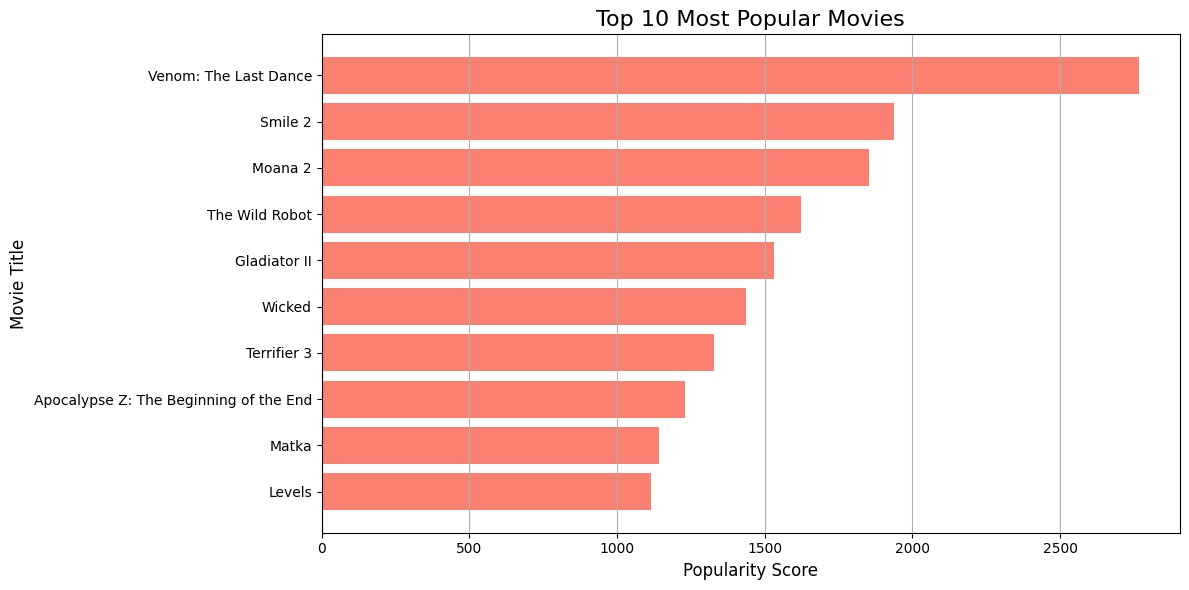

In [5]:
def plot_most_popular_movies(movies_df):
    movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')
    top_popular = movies_df.nlargest(10, 'popularity')[['title', 'popularity']]

    plt.figure(figsize=(12, 6))
    plt.barh(top_popular['title'], top_popular['popularity'], color='salmon')
    plt.title("Top 10 Most Popular Movies", fontsize=16)
    plt.xlabel("Popularity Score", fontsize=12)
    plt.ylabel("Movie Title", fontsize=12)
    plt.gca().invert_yaxis()
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()


plot_most_popular_movies(movies_df)


This function analyzes the top 10 most popular movies by listing their titles and popularity scores, computing key statistics such as the highest, lowest, and average popularity scores, and highlighting the most popular movie with its score.

In [6]:
def analyze_most_popular_movies(movies_df):
    # Ensure 'popularity' column is numeric
    movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')

    # Extract the top 10 most popular movies
    top_popular = movies_df.nlargest(10, 'popularity')[['title', 'popularity']]
    
    # Initialize the analysis
    analysis = "Analysis of Top 10 Most Popular Movies:\n\n"
    
    # Add details for each movie with proper numbering
    for i, row in enumerate(top_popular.itertuples(index=False), start=1):
        analysis += f"{i}. {row.title}: Popularity Score = {row.popularity:.2f}\n"
    
    # Calculate key statistics
    highest_popularity = top_popular['popularity'].max()
    lowest_popularity = top_popular['popularity'].min()
    average_popularity = top_popular['popularity'].mean()
    
    analysis += "\nKey Statistics:\n"
    analysis += f" - Highest Popularity Score: {highest_popularity:.2f}\n"
    analysis += f" - Lowest Popularity Score: {lowest_popularity:.2f}\n"
    analysis += f" - Average Popularity Score of Top 10 Movies: {average_popularity:.2f}\n"
    
    # Highlight the movie with the highest popularity score
    most_popular_movie = top_popular[top_popular['popularity'] == highest_popularity]['title'].values[0]
    analysis += f" - The most popular movie is '{most_popular_movie}' with a popularity score of {highest_popularity:.2f}.\n"
    
    return analysis

# Example usage
most_popular_analysis = analyze_most_popular_movies(movies_df)
print(most_popular_analysis)


Analysis of Top 10 Most Popular Movies:

1. Venom: The Last Dance: Popularity Score = 2767.29
2. Smile 2: Popularity Score = 1937.92
3. Moana 2: Popularity Score = 1853.71
4. The Wild Robot: Popularity Score = 1622.39
5. Gladiator II: Popularity Score = 1530.03
6. Wicked: Popularity Score = 1437.53
7. Terrifier 3: Popularity Score = 1327.33
8. Apocalypse Z: The Beginning of the End: Popularity Score = 1231.46
9. Matka: Popularity Score = 1142.36
10. Levels: Popularity Score = 1115.07

Key Statistics:
 - Highest Popularity Score: 2767.29
 - Lowest Popularity Score: 1115.07
 - Average Popularity Score of Top 10 Movies: 1596.51
 - The most popular movie is 'Venom: The Last Dance' with a popularity score of 2767.29.



This function visualizes the number of movie releases by year by extracting the release years from the dataset, counting the movies released each year, and plotting the data as a line chart with markers to highlight trends over time.

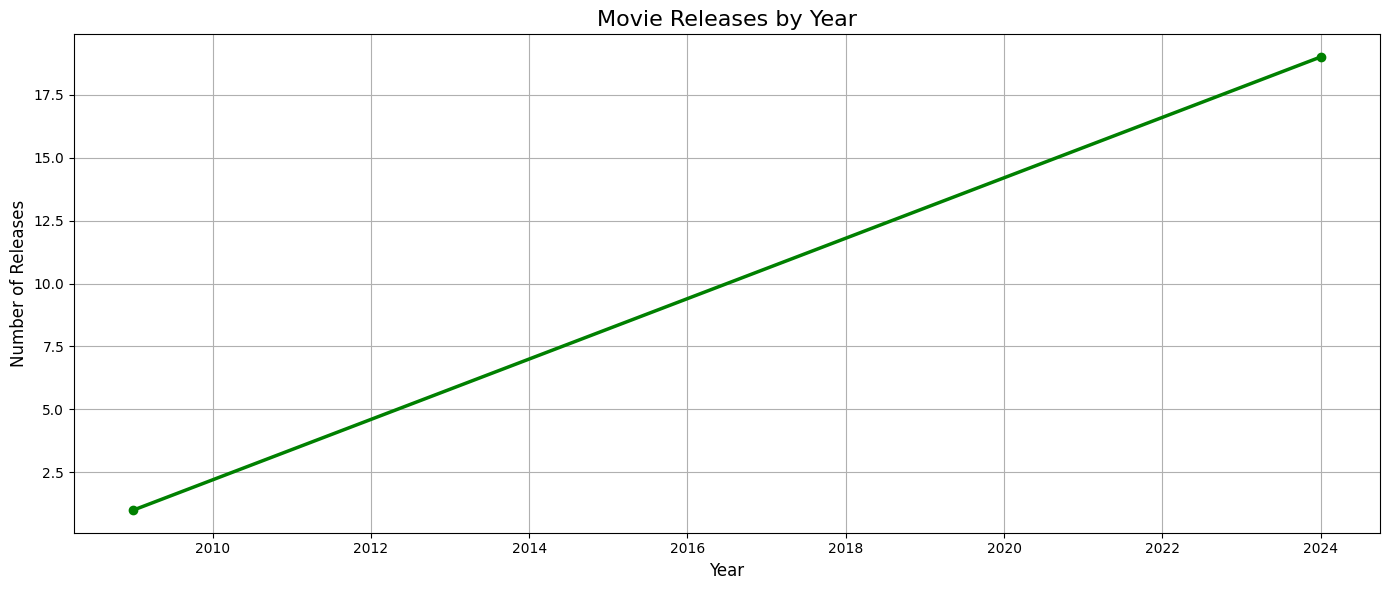

In [7]:
def plot_movie_releases_by_year(movies_df):
    movies_df['release_year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year
    release_counts = movies_df['release_year'].value_counts().sort_index()

    plt.figure(figsize=(14, 6))
    plt.plot(release_counts.index, release_counts.values, marker='o', color='green', linewidth=2.5)
    plt.title("Movie Releases by Year", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Number of Releases", fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()


plot_movie_releases_by_year(movies_df)


This function analyzes the yearly distribution of movie releases, summarizing the total number of releases, identifying years with the most and fewest releases, assessing trends over the last 10 years, and evaluating long-term growth or decline in the number of releases.

In [8]:
def analyze_movie_releases_by_year(movies_df):
    # Extract release year from release_date
    movies_df['release_year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year
    
    # Count the number of movies released each year
    release_counts = movies_df['release_year'].value_counts().sort_index()

    # Initialize analysis report
    analysis = "Analysis of Movie Releases by Year:\n\n"
    
    # General trends
    total_years = len(release_counts)
    total_releases = release_counts.sum()
    max_releases = release_counts.max()
    max_release_year = release_counts.idxmax()
    min_releases = release_counts.min()
    min_release_year = release_counts.idxmin()

    analysis += (
        f" - Total Number of Years with Data: {total_years}\n"
        f" - Total Number of Movie Releases: {total_releases}\n"
        f" - Year with Most Releases: {max_release_year} ({max_releases} movies)\n"
        f" - Year with Fewest Releases: {min_release_year} ({min_releases} movies)\n\n"
    )

    # Recent trends
    if total_years >= 10:
        recent_releases = release_counts[-10:]  # Last 10 years of data
        avg_recent_releases = recent_releases.mean()
        analysis += (
            "Recent Trends (Last 10 Years):\n"
            f" - Average Number of Releases: {avg_recent_releases:.1f} per year\n"
            f" - Most Recent Year with Data: {release_counts.index[-1]}\n"
            f" - Releases in the Most Recent Year: {recent_releases.iloc[-1]} movies\n\n"
        )
    
    # Growth or decline pattern
    first_year = release_counts.index[0]
    last_year = release_counts.index[-1]
    first_year_count = release_counts.iloc[0]
    last_year_count = release_counts.iloc[-1]
    
    if last_year_count > first_year_count:
        growth_rate = ((last_year_count - first_year_count) / first_year_count) * 100
        analysis += (
            "Long-Term Trend:\n"
            f" - The number of movie releases has increased by {growth_rate:.1f}% from {first_year} ({first_year_count} movies) "
            f"to {last_year} ({last_year_count} movies).\n"
        )
    elif last_year_count < first_year_count:
        decline_rate = ((first_year_count - last_year_count) / first_year_count) * 100
        analysis += (
            "Long-Term Trend:\n"
            f" - The number of movie releases has decreased by {decline_rate:.1f}% from {first_year} ({first_year_count} movies) "
            f"to {last_year} ({last_year_count} movies).\n"
        )
    else:
        analysis += (
            "Long-Term Trend:\n"
            f" - The number of movie releases has remained stable from {first_year} ({first_year_count} movies) "
            f"to {last_year} ({last_year_count} movies).\n"
        )
    
    return analysis

# Example usage
movie_release_analysis = analyze_movie_releases_by_year(movies_df)
print(movie_release_analysis)


Analysis of Movie Releases by Year:

 - Total Number of Years with Data: 2
 - Total Number of Movie Releases: 20
 - Year with Most Releases: 2024 (19 movies)
 - Year with Fewest Releases: 2009 (1 movies)

Long-Term Trend:
 - The number of movie releases has increased by 1800.0% from 2009 (1 movies) to 2024 (19 movies).



This function visualizes the distribution of average movie votes by creating a histogram that shows the frequency of movies within different vote ranges, providing an overview of how ratings are distributed.

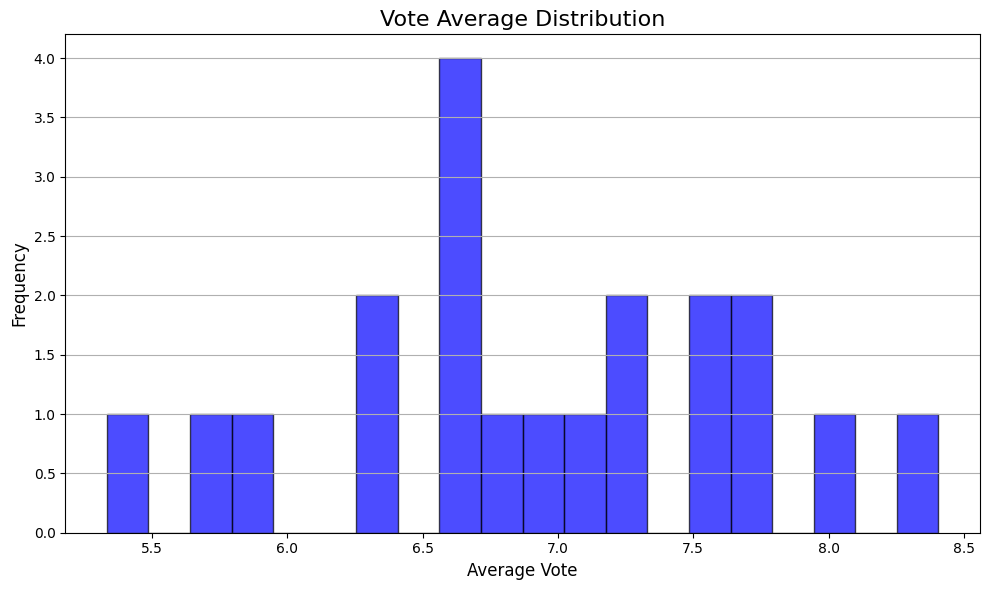

In [9]:
def plot_vote_distribution(movies_df):
    plt.figure(figsize=(10, 6))
    plt.hist(movies_df['vote_average'], bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title("Vote Average Distribution", fontsize=16)
    plt.xlabel("Average Vote", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


plot_vote_distribution(movies_df)


This function analyzes the distribution of average movie votes by calculating key statistics (mean, median, standard deviation, minimum, maximum), identifying the skewness of the distribution, and assessing the variability of ratings.

In [10]:
def analyze_vote_distribution(movies_df):
    # Extract the 'vote_average' column
    vote_data = movies_df['vote_average'].dropna()
    
    # Compute statistics
    mean_vote = vote_data.mean()
    median_vote = vote_data.median()
    std_dev_vote = vote_data.std()
    min_vote = vote_data.min()
    max_vote = vote_data.max()
    
    # Initialize the analysis report
    analysis = "Analysis of Vote Average Distribution:\n\n"
    
    # Key statistics
    analysis += (
        f" - Mean Average Vote: {mean_vote:.2f}\n"
        f" - Median Average Vote: {median_vote:.2f}\n"
        f" - Standard Deviation: {std_dev_vote:.2f}\n"
        f" - Minimum Average Vote: {min_vote:.1f}\n"
        f" - Maximum Average Vote: {max_vote:.1f}\n\n"
    )
    
    # Distribution characteristics
    if mean_vote > median_vote:
        skew = "right-skewed"
    elif mean_vote < median_vote:
        skew = "left-skewed"
    else:
        skew = "symmetric"
    
    analysis += f" - The distribution appears to be {skew}.\n"
    
    # Identify clusters (optional deeper insight)
    if std_dev_vote < 1:
        analysis += " - The votes are tightly clustered around the mean, indicating less variability.\n"
    else:
        analysis += " - The votes show significant variability, indicating a wider spread of ratings.\n"
    
    return analysis

# Example usage
vote_distribution_analysis = analyze_vote_distribution(movies_df)
print(vote_distribution_analysis)


Analysis of Vote Average Distribution:

 - Mean Average Vote: 6.93
 - Median Average Vote: 6.81
 - Standard Deviation: 0.79
 - Minimum Average Vote: 5.3
 - Maximum Average Vote: 8.4

 - The distribution appears to be right-skewed.
 - The votes are tightly clustered around the mean, indicating less variability.



This function visualizes the relationship between movie popularity and average vote by plotting a scatter plot, with popularity scores on the x-axis and average votes on the y-axis, to explore potential trends or correlations between these metrics.

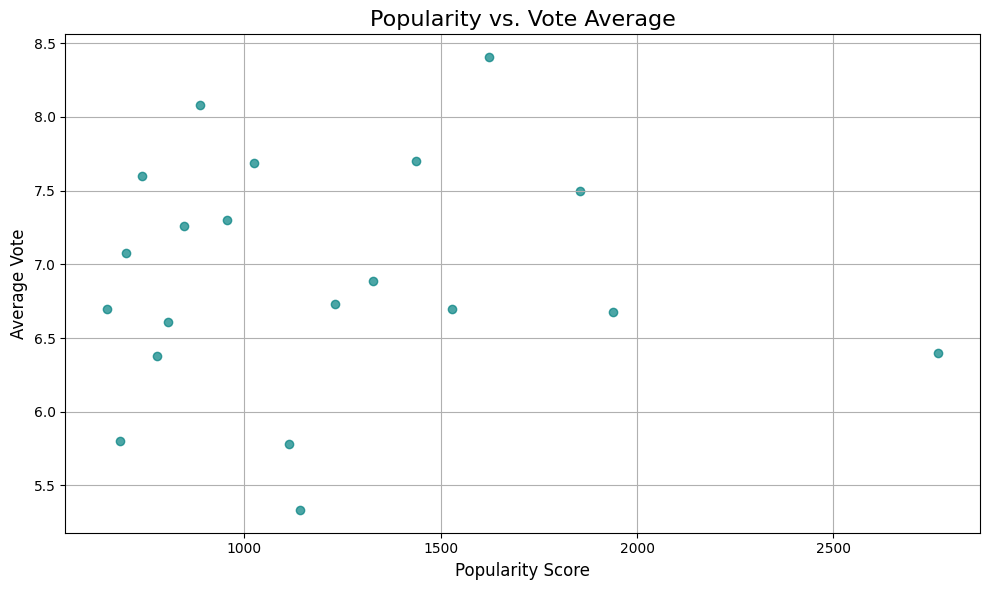

In [11]:
def plot_popularity_vs_vote(movies_df):
    movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')

    plt.figure(figsize=(10, 6))
    plt.scatter(movies_df['popularity'], movies_df['vote_average'], alpha=0.7, color='teal')
    plt.title("Popularity vs. Vote Average", fontsize=16)
    plt.xlabel("Popularity Score", fontsize=12)
    plt.ylabel("Average Vote", fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()


plot_popularity_vs_vote(movies_df)


This function analyzes the relationship between movie popularity and average vote by calculating their correlation, identifying the most and least popular and highest- and lowest-rated movies, and summarizing variability in popularity and votes, providing a detailed report of key insights and trends.

In [12]:
def analyze_popularity_vs_vote(movies_df):
    # Ensure 'popularity' is numeric
    movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')
    
    # Drop rows with missing values in 'popularity' or 'vote_average'
    valid_data = movies_df.dropna(subset=['popularity', 'vote_average'])
    
    # Calculate correlation
    correlation = np.corrcoef(valid_data['popularity'], valid_data['vote_average'])[0, 1]
    trend = (
        "positive" if correlation > 0.5 else
        "negative" if correlation < -0.5 else
        "weak or no"
    )
    
    # Identify extremes
    most_popular_movie = valid_data.loc[valid_data['popularity'].idxmax()]
    highest_rated_movie = valid_data.loc[valid_data['vote_average'].idxmax()]
    least_popular_movie = valid_data.loc[valid_data['popularity'].idxmin()]
    lowest_rated_movie = valid_data.loc[valid_data['vote_average'].idxmin()]
    
    # Generate analysis report
    analysis = "Analysis of Popularity vs. Vote Average:\n\n"
    analysis += (
        f" - Correlation between Popularity and Average Vote: {correlation:.2f}\n"
        f"   -> This indicates a {trend} relationship.\n\n"
    )
    
    # Highlight notable observations
    analysis += "Notable Observations:\n"
    analysis += (
        f" - Most Popular Movie: '{most_popular_movie['title']}' with a popularity score of {most_popular_movie['popularity']:.2f}.\n"
        f" - Highest Rated Movie: '{highest_rated_movie['title']}' with an average vote of {highest_rated_movie['vote_average']:.1f}.\n"
        f" - Least Popular Movie: '{least_popular_movie['title']}' with a popularity score of {least_popular_movie['popularity']:.2f}.\n"
        f" - Lowest Rated Movie: '{lowest_rated_movie['title']}' with an average vote of {lowest_rated_movie['vote_average']:.1f}.\n"
    )
    
    # Variability insights
    popularity_range = valid_data['popularity'].max() - valid_data['popularity'].min()
    vote_range = valid_data['vote_average'].max() - valid_data['vote_average'].min()
    analysis += (
        f"\nVariability Insights:\n"
        f" - Popularity Range: {popularity_range:.2f} (from {valid_data['popularity'].min():.2f} to {valid_data['popularity'].max():.2f}).\n"
        f" - Average Vote Range: {vote_range:.2f} (from {valid_data['vote_average'].min():.1f} to {valid_data['vote_average'].max():.1f}).\n"
    )
    
    return analysis

# Example usage
popularity_vs_vote_analysis = analyze_popularity_vs_vote(movies_df)
print(popularity_vs_vote_analysis)


Analysis of Popularity vs. Vote Average:

 - Correlation between Popularity and Average Vote: 0.03
   -> This indicates a weak or no relationship.

Notable Observations:
 - Most Popular Movie: 'Venom: The Last Dance' with a popularity score of 2767.29.
 - Highest Rated Movie: 'The Wild Robot' with an average vote of 8.4.
 - Least Popular Movie: 'Spellbound' with a popularity score of 650.38.
 - Lowest Rated Movie: 'Matka' with an average vote of 5.3.

Variability Insights:
 - Popularity Range: 2116.91 (from 650.38 to 2767.29).
 - Average Vote Range: 3.07 (from 5.3 to 8.4).

